# **Investigate Hotel Business** 

Author : Ilham Muhammad Shuhada 

---
<br>

**Table of Content:**
- Introduction
- Load Dataset
- Data Preprocessing 
<br>
<br>

## Introduction

It is very important for a company to always analyze its business performance. On this occasion, we will delve deeper into business in the hospitality sector. Our focus is to find out how our customers behave in making hotel reservations, and its relationship to the rate of cancellation of hotel reservations. We will present the results of the insights we find in the form of data visualization to make it easier to understand and more persuasive.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('hotel_bookings_data.csv')

In [3]:
df.shape

(119390, 29)

In [4]:
# Overview data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Data Preparation

1. Cek Tipe Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

2. Cek Duplikat

In [6]:
df.duplicated().sum()

33261

**Key Takeways** :
- Terapat 119.390 data
- Tipe data object, int64, dan float64
- Terdapat 33.261 data duplikat

3. Cek Kesesuaian Data

In [7]:
# Cek data type
for col in df.columns:
    print("{} have {} unique values, type:{}".format(col, df[col].nunique(),df[col].dtypes))
    print("unique values : \n{}".format(df[col].value_counts()))
    print('-' * 100)

hotel have 2 unique values, type:object
unique values : 
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
----------------------------------------------------------------------------------------------------
is_canceled have 2 unique values, type:int64
unique values : 
0    75166
1    44224
Name: is_canceled, dtype: int64
----------------------------------------------------------------------------------------------------
lead_time have 479 unique values, type:int64
unique values : 
0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
400       1
370       1
532       1
371       1
463       1
Name: lead_time, Length: 479, dtype: int64
----------------------------------------------------------------------------------------------------
arrival_date_year have 3 unique values, type:int64
unique values : 
2018    56707
2019    40687
2017    21996
Name: arrival_date_year, dtype: int64
---------------------------------------------------------------------

Key Takeways:
- Terdapat **Undefined** values pada fitur `meal`,`market_segment`,dan `distribution_channel`
- Tipe data float pada fitur `children`,`agent`, `company` seharusnya int

4. Cek Null Values

In [8]:
# Null value
print(((df.isnull().sum()/len(df))*100).round(2).sort_values(ascending=False))

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


Key Takeways:
- Terdapat **Null** values pada fitur `company`,`agent`, `children` dan `city`
- perlu penanganan null values pada fitur tersebut

In [9]:
df.describe().round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2018.16,27.17,15.80,0.93,2.50,1.86,0.1,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.4,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2017.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2018.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2018.00,28.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2019.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2019.00,53.00,31.00,19.00,50.00,55.00,10.0,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


Key Takeways :
- Terdapat data negatif pada kolom adr, perlu di handling

In [10]:
# Cek jumlah pelanggan setiap hari 
df_guest = df['adults'] + df['children'] + df['babies']
df['total_guest'] = df_guest
print("jumlah pelanggan 0 ada {}".format(df[df['total_guest'] == 0].shape[0]))

jumlah pelanggan 0 ada 180


Key takeways:
- Terdapat 180 kamar yang tidak ditempati tamu
- data ini akan di drop

5. Cek Outlier Data

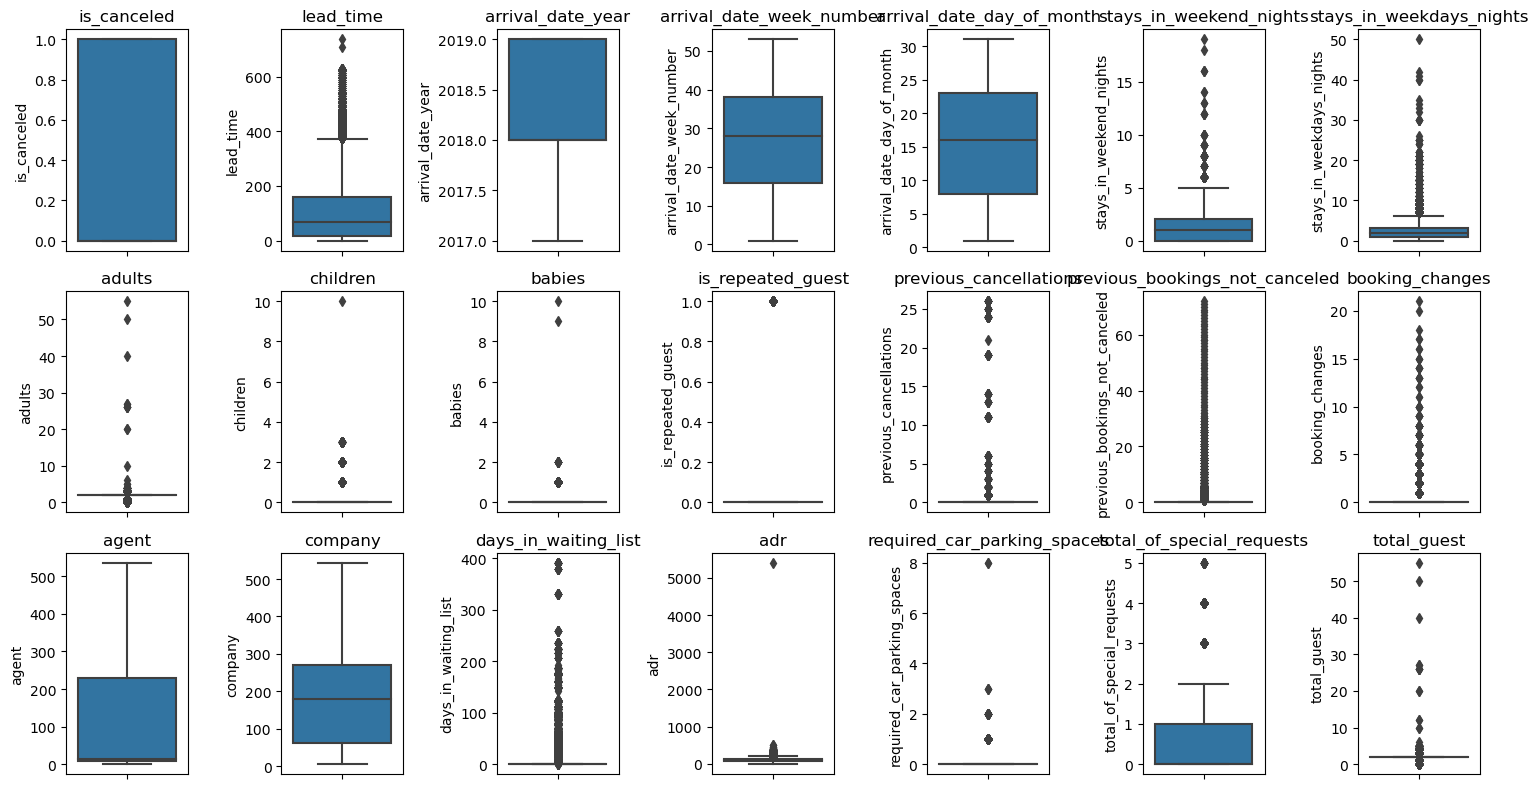

In [11]:
# cek outlier using boxplot
nums = df.select_dtypes(include=['int64', 'float']).columns.tolist()

# Define the number of rows and columns for subplots
num_rows = 3
num_cols = 7  # Adjust this based on the number of columns in your 'nums' list

plt.figure(figsize=(15, 8))
for i in range(0, len(nums)):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(y=df[nums[i]], orient='v')
    plt.title(nums[i])  
    plt.tight_layout()

plt.show()

Key Takeways:
- Terdapat outlier pada `adr`, `required_parking_car`, `babies`, dan `children` 

## Data Cleaning

In [12]:
df_clean = df.copy()

In [13]:
df_clean.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out,2.0


#### **Handling Data Null** 

Treatment :
- `company` - null value **diisi dengan 0**, mengindikasikan tamu tidak bersal dari company
- `agent` - null value **diisi dengan 0**, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
- `city` - null values diisi dengan **'Undefined'**, karena kota tidak diketahui secara pasti.
- `children` - null values **diisi dengan 0**, mengindikasikan tamu tidak membawa anak.

In [19]:
df_clean['company'].fillna(0, inplace=True)
df_clean['agent'].fillna(0, inplace=True)
df_clean['city'].fillna('Undefined', inplace=True)
df_clean['children'].fillna(0, inplace=True)

In [25]:
df_clean['total_guest'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']

In [26]:
df_clean.isna().sum().sum()

0

#### **Handling Data Tidak Sesuai** 
Fitur `meal` karena terdapat undefined, maka akan dikategorikan menjadi meal dan non meal

In [79]:
df_clean['meal'].replace(['Breakfast','Dinner','Full Board'], 'With Meal', inplace=True)
df_clean['meal'].replace(['No Meal','Undefined'], 'No Meal', inplace=True)

mengganti fitur float pada `children`,`agent`, `company` menjadi int

In [27]:
df_clean['children'] = df_clean['children'].astype(int)
df_clean['agent'] = df_clean['agent'].astype(int)
df_clean['company'] = df_clean['company'].astype(int)

#### **Handling Data Outlier Ekstriem pada `adr`, `required_parking_car`, `babies`, dan `children`**

In [ ]:
# extrem adr
index_adr = df_clean[(df_clean['adr'] < 0) | (df_clean['adr'] > 5000)]
df_clean.drop(index=index_adr.index, inplace=True)
# --------------------------------------------------------------------------------
# required_car_parking_spaces
index_parking = df_clean[(df_clean['required_car_parking_spaces'] == 8)]
df_clean.drop(index = index_parking.index, inplace=True)

# --------------------------------------------------------------------------------
# babies
index_bb = df_clean[(df_clean['babies'] > 8)]
df_clean.drop(index = index_bb.index, inplace=True)

# --------------------------------------------------------------------------------
# children
index_ch = df_clean[(df_clean['children'] == 10)]
df_clean.drop(index = index_ch.index, inplace=True)

# --------------------------------------------------------------------------------
# tidak ada tamu
index_guest_0 = df_clean['adults']+df_clean['children']+df_clean['babies']
index_guest_0 = df_clean[index_guest_0 == 0]
df_clean.drop(index = index_guest_0.index, inplace=True)

#### **Handling Data Duplikat** 

tidak dilakukan handling data duplikat karena pada data tidak terdapat primary key atau unique id sehingga satu data tidak pasti merepresentasikan satu transaksi, maka tidak akan dilakukan handling duplicate 

In [33]:
print('jumlah baris sebelum filter outlier adalah :', len(df))
print('jumlah baris setelah filter outlier adalah :', len(df_clean))

jumlah baris sebelum filter outlier adalah : 119390
jumlah baris setelah filter outlier adalah : 119203


## Data Visualization